<a href="https://colab.research.google.com/github/mahmud-shaikh/Classification---Max-Life-Health-Insurance-Cross-Sell-Prediction/blob/main/ML_Submission_Mahmud_Shaikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Max Life Health Insurance Cross Sell Prediction**



##### **Project Type**    - Supervised-Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mohammad Mahmud Shaikh

# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**
1. Checked correlation between features.
2. Analyzed demographic and behavior features.
3. Analyzed impact of premium and vehicle age.
4. Studied the effect of customer engagement (Vintage).
5. Investigated driving license and policy sales channel.


**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. XG Boost Classifier

# **GitHub Link -**

https://github.com/mahmud-shaikh/Classification---Max-Life-Health-Insurance-Cross-Sell-Prediction.

# **Problem Statement**


An insurance company that currently offers health insurance is seeking to expand its revenue by cross-selling vehicle insurance to its existing customer base. However, not all customers are equally likely to purchase additional insurance products. Randomly targeting the entire customer pool with promotional offers leads to low conversion rates and inefficient use of marketing resources.

To solve this, the company needs a predictive model that can accurately identify customers who are likely to be interested in purchasing vehicle insurance. This model should leverage customer demographic information, past insurance behavior, and engagement metrics to determine their propensity to respond positively to a cross-sell offer.

##Dataset Overview
The dataset used in this project is provided in CSV format. Each row represents a unique customer, and each column includes attributes that describe their profile or behavior.

Key features in the dataset include:

* **Gender**: Male or Female

* **Age**: Numeric value indicating the customer’s age

* **Driving_License**: Whether the customer has a valid driving license

* **Region_Code**: Coded value representing the customer’s location

* **Previously_Insured**: Indicates whether the customer already has vehicle insurance

* **Vehicle_Age**: Age group of the vehicle (e.g., <1 Year, 1–2 Years, >2 Years)

* **Vehicle_Damage**: Whether the customer’s vehicle has previously been damaged

* **Annual_Premium**: The premium paid by the customer for health insurance

* **Policy_Sales_Channel**: Code representing the sales channel through which the policy was sold

* **Vintage**: Number of days since the customer was associated with the company

* **Response**: Target variable (1 = Interested in vehicle insurance, 0 = Not interested)

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [ ]:
#mounting the data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
path='/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
# There are 3,81,109 rows and 12 columns

(381109, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

In [ ]:
print(f'We have {df.duplicated().sum()} duplicate values in dataset')

We have 0 duplicate values in dataset


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


So there are no null values.

Text(0.5, 1.0, ' Visualising Missing Values')

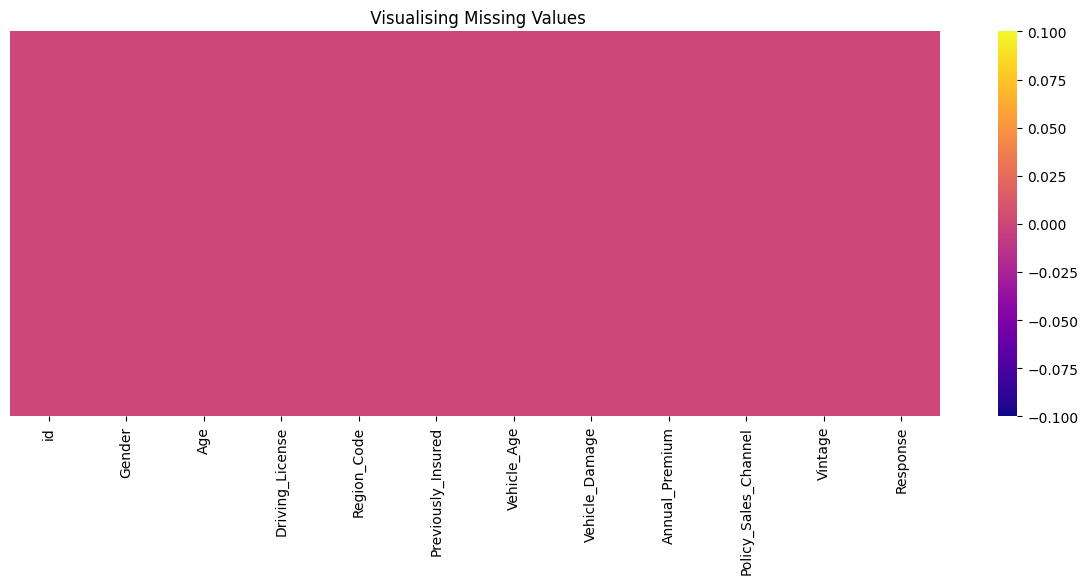

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

The dataset contains 3,81,109 rows and 12 columns, representing a sizable amount of information for analysis. There are no missing values or duplicate entries, indicating that the data is clean and ready for further processing and modeling. This suggests a reliable and well-maintained dataset suitable for generating meaningful insights.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

**Gender**: Male or Female

**Age**: Numeric value indicating the customer’s age

**Driving_License**: Whether the customer has a valid driving license

**Region_Code**: Coded value representing the customer’s location

**Previously_Insured**: Indicates whether the customer already has vehicle insurance

**Vehicle_Age**: Age group of the vehicle (e.g., <1 Year, 1–2 Years, >2 Years)

**Vehicle_Damage**: Whether the customer’s vehicle has previously been damaged

**Annual_Premium**: The premium paid by the customer for health insurance

**Policy_Sales_Channel**: Code representing the sales channel through which the policy was sold

**Vintage**: Number of days since the customer was associated with the company

**Response**: **Target variable** (1 = Interested in vehicle insurance, 0 = Not interested)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
variable_df=df.columns.to_list()

In [ ]:
for i in variable_df:
  print(f"The Unique Values of {i} are: {df[i].unique()}")

The Unique Values of id are: [     1      2      3 ... 381107 381108 381109]
The Unique Values of Gender are: ['Male' 'Female']
The Unique Values of Age are: [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
The Unique Values of Driving_License are: [1 0]
The Unique Values of Region_Code are: [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
The Unique Values of Previously_Insured are: [0 1]
The Unique Values of Vehicle_Age are: ['> 2 Years' '1-2 Year' '< 1 Year']
The Unique Values of Vehicle_Damage are: ['Yes' 'No']
The Unique Values of Annual_Premium are: [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
The Unique Values of Policy_Sales_Channel are: [ 26. 152. 160. 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Remove 'id' from the dataset if it exists
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Separate numerical and categorical columns based on cardinality
numerical_columns = [col for col in df.columns if df[col].nunique() > 5 and df[col].dtype in ['int64', 'float64']]
categorical_columns = [col for col in df.columns if col not in numerical_columns]

In [ ]:
print(numerical_columns)

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [ ]:
print(categorical_columns)

['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']


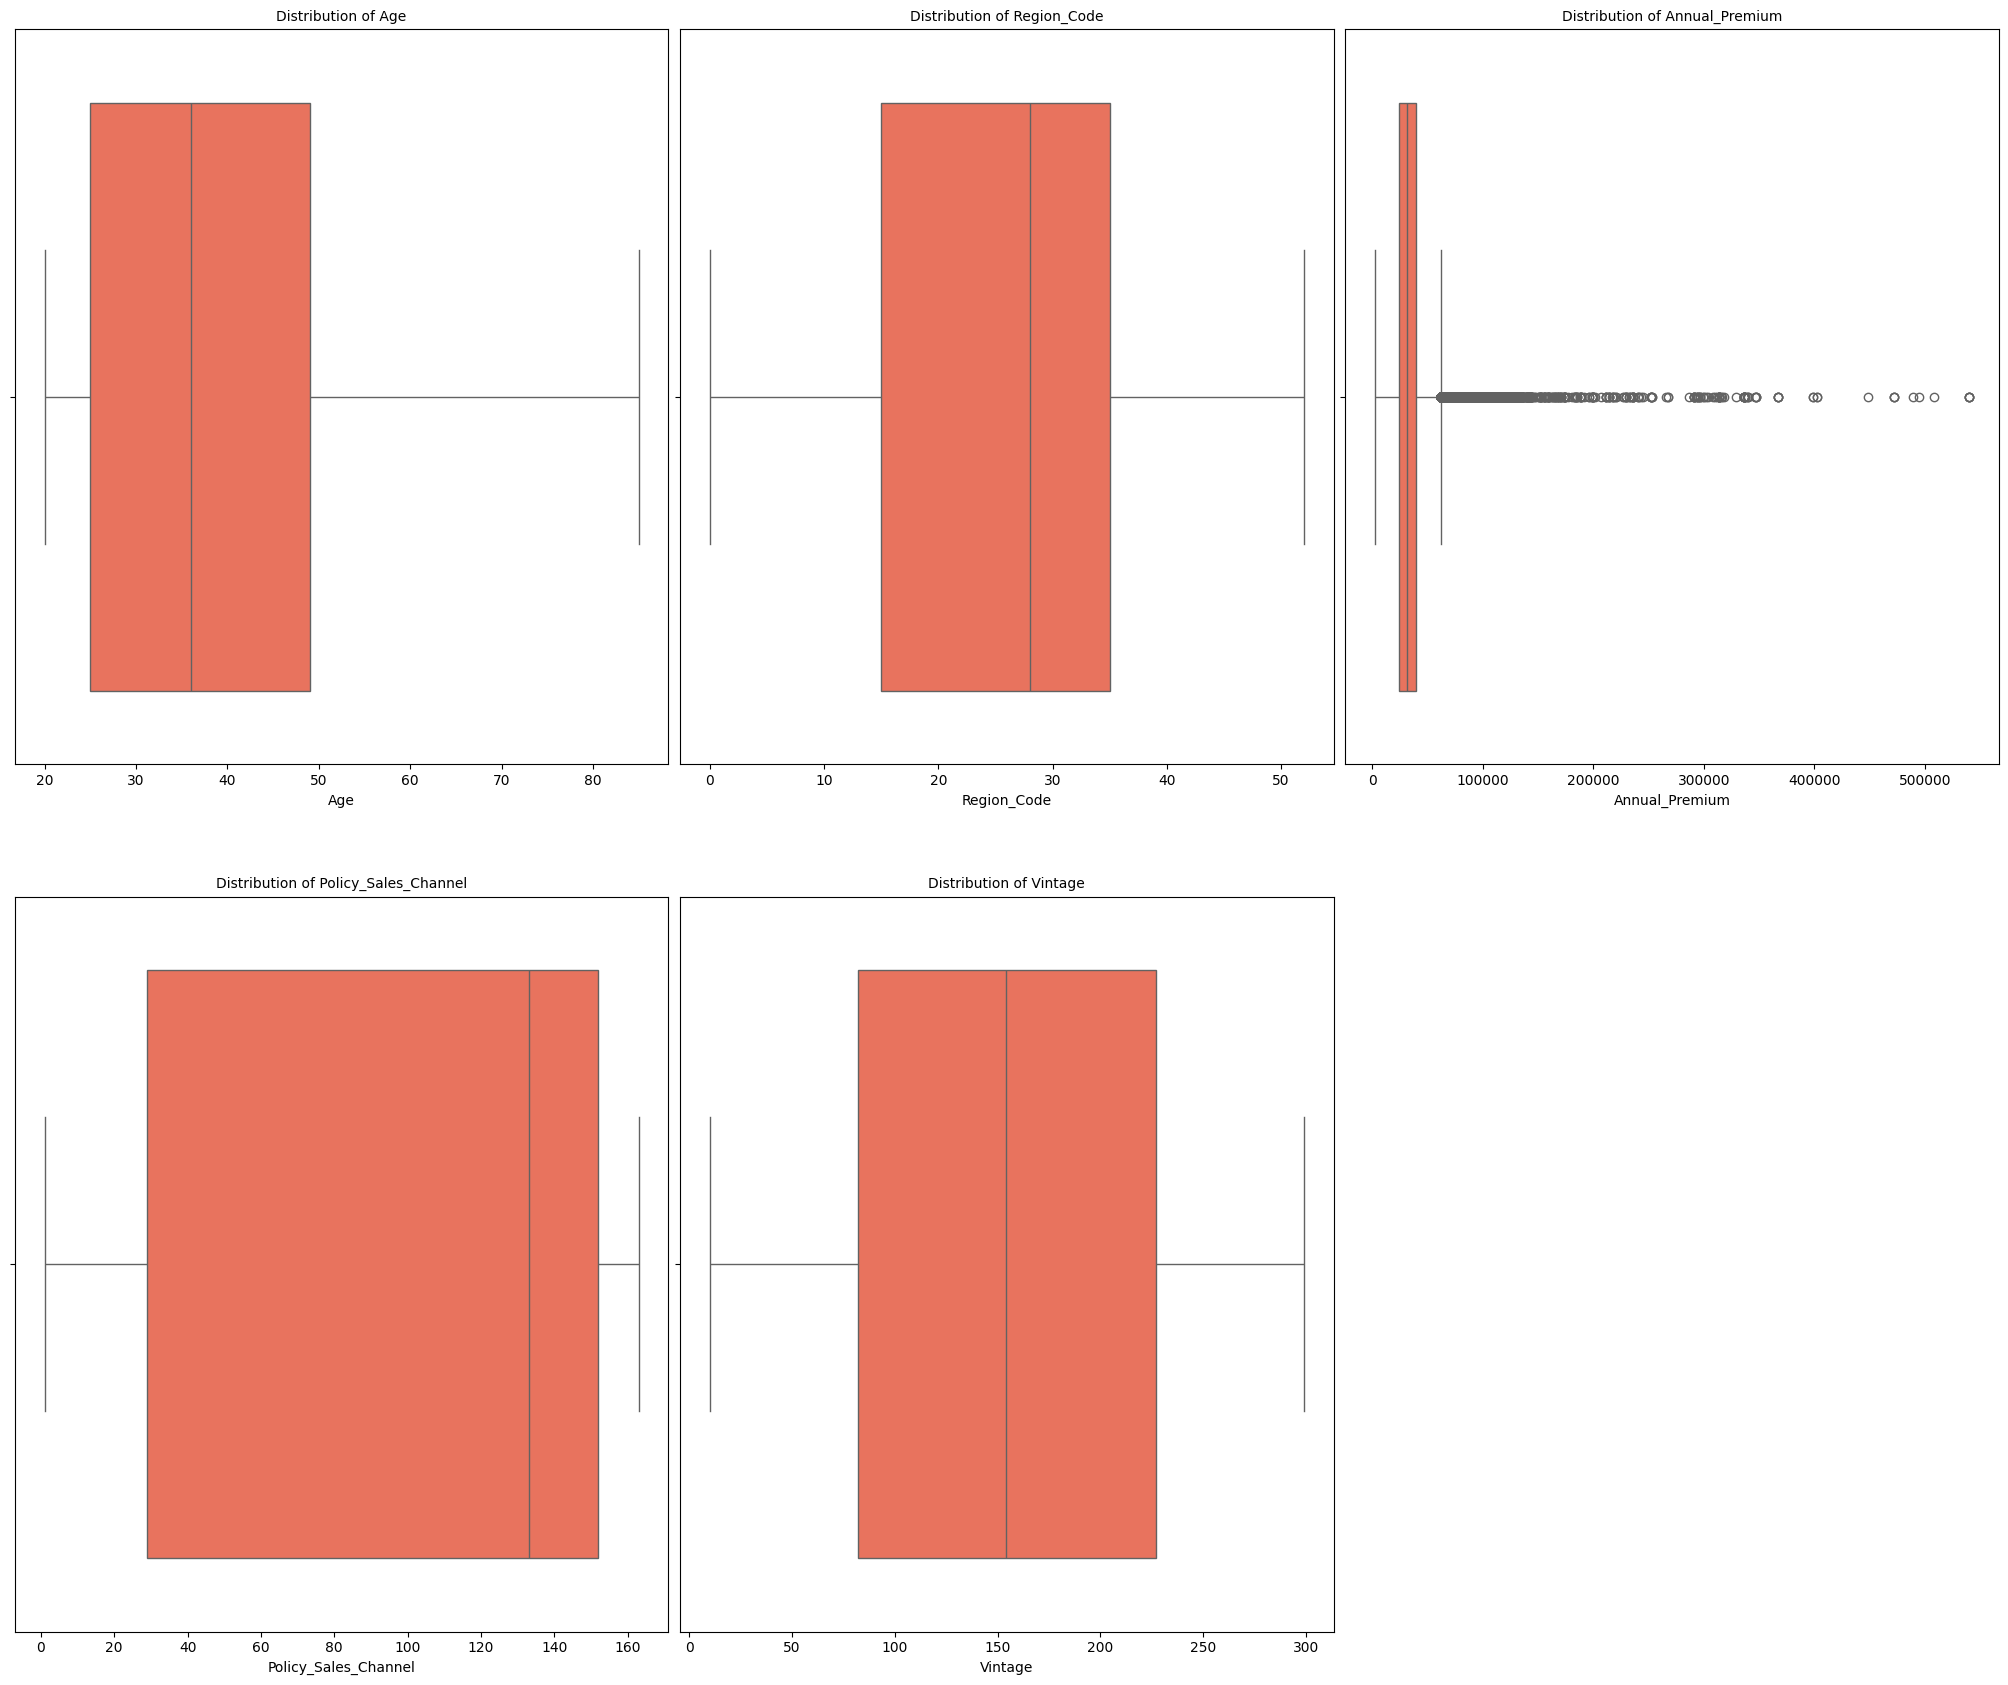

In [ ]:
# Write your code to make your dataset analysis ready.

#Checking for outliers

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 25))
c = 1
for i in numerical_columns:
    plt.subplot(3, 3, c)  # Adjust number of rows/cols based on your variable count
    sns.boxplot(x=df[i], color="tomato")
    plt.title('Distribution of {}'.format(i), fontsize=10)
    c += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Based on the boxplot analysis and column-wise distribution, we identified the presence of outliers in the numerical features of the dataset. The key numerical columns include Age, Region_Code, Annual_Premium, and Vintage. Among these, the column **Annual_Premium** shows significant outliers. This is evident from its boxplot, where several data points lie far beyond the upper whisker, indicating a right-skewed distribution. These outliers represent customers paying unusually high premiums compared to the majority.

<Axes: ylabel='Annual_Premium_log'>

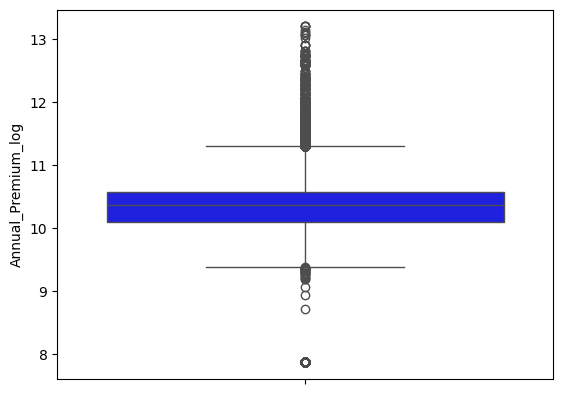

In [ ]:
#Outlier handling using log1p() transformaton
import numpy as np

df['Annual_Premium_log'] = np.log1p(df['Annual_Premium'])
sns.boxplot(df['Annual_Premium_log'],color='blue')

The transformed values (Annual_Premium_log) are more normally distributed, with the bulk of the data now centered and spread evenly.

In [ ]:
#Use Annual_Premium_log instead of Annual_Premium to improve model stability and reduce bias from skewed values.
df.drop('Annual_Premium', axis=1, inplace=True)  # optional
df.rename(columns={'Annual_Premium_log': 'Annual_Premium'}, inplace=True)

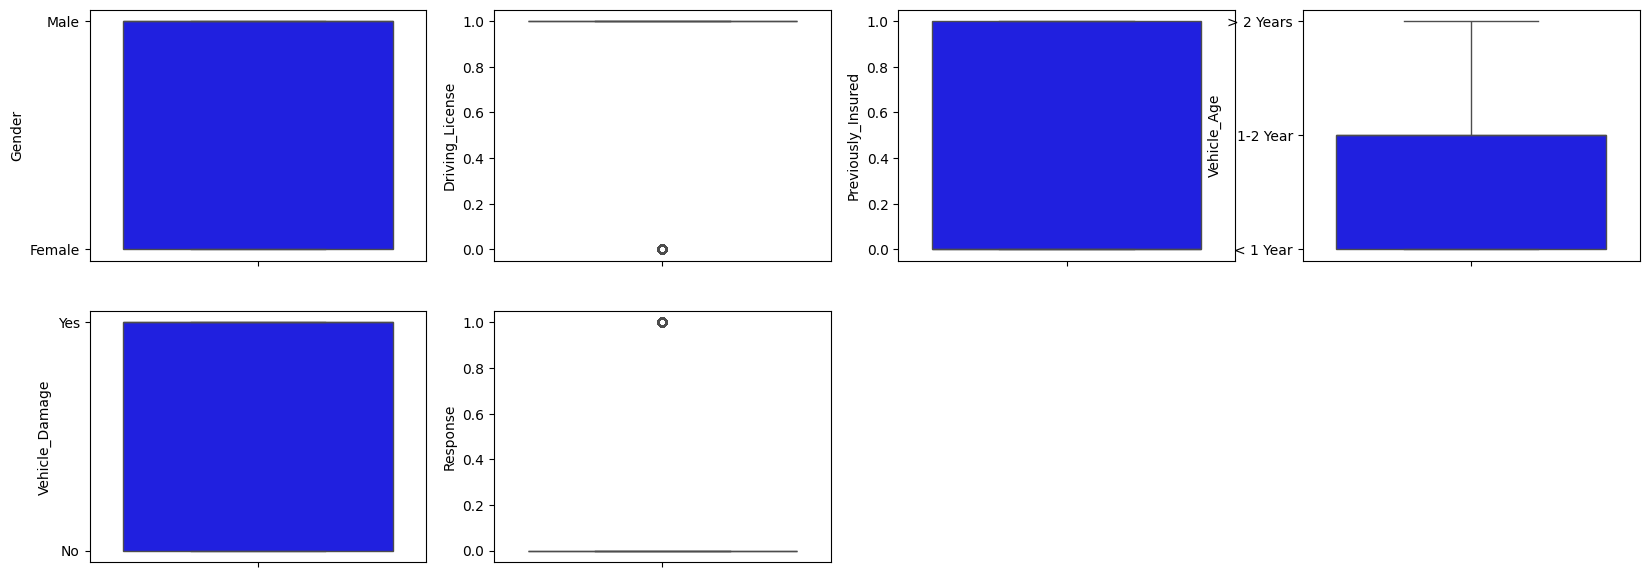

In [ ]:
columns = categorical_columns
plt.figure(figsize=(20,15))
m=1
for i in columns:
  plt.subplot(4,4,m)
  m = m+1
  sns.boxplot(df[i],color="blue")

### What all manipulations have you done and insights you found?

We have created a separate columns for Numerical and Categorical Variables to work accordingly.It will help to understand the basic relationship between the features(defined as Categorical and Numerical) and the target variables.

During the data preprocessing phase, we focused on identifying and treating outliers in the numerical columns of the dataset. Using a custom logic where numerical columns were defined as those with more than five unique values, we discovered that the Annual_Premium feature exhibited significant skewness and outliers. A boxplot visualization confirmed that many data points lay far outside the interquartile range, especially on the higher end of the scale, indicating extreme premium values.

To address this, we applied a logarithmic transformation using the np.log1p() function, which compresses large values and helps normalize the distribution without losing data. The transformed column, Annual_Premium_log, was then visualized using a new boxplot. The results showed a noticeable reduction in skewness, and the data became more symmetrically distributed. Although a few mild outliers remained, they were less extreme and no longer likely to distort model performance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

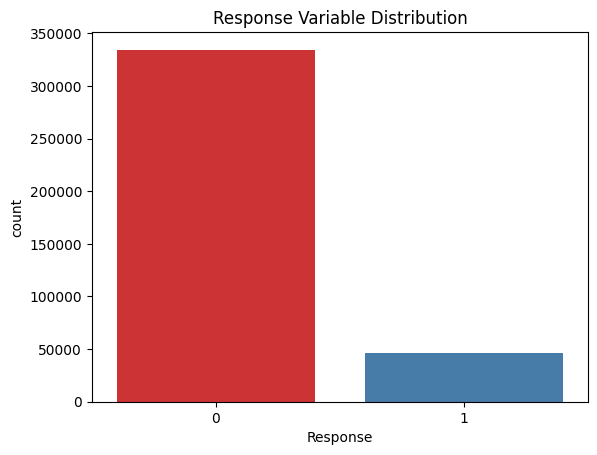

In [ ]:
# 1. Bar Plot – Target Variable (Response)
sns.countplot(x='Response', data=df, palette='Set1')
plt.title('Response Variable Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Understand if the data is imbalanced.

##### 2. What is/are the insight(s) found from the chart?

The dataset is highly imbalanced with far fewer positive responses.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This imbalance guides the use of stratified sampling or SMOTE to ensure the model learns from both classes effectively.

#### Chart - 2

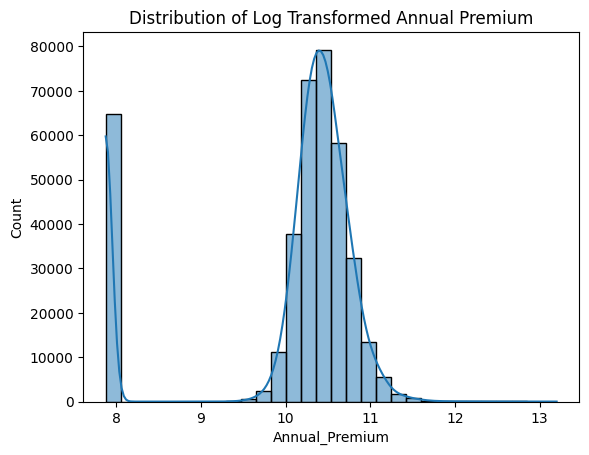

In [ ]:
# 2. Histogram – Annual_Premium
sns.histplot(df['Annual_Premium'], bins=30, kde=True)
plt.title('Distribution of Log Transformed Annual Premium')
plt.show()

##### 1. Why did you pick the specific chart?

Visualize the distribution of customer spending on insurance.

##### 2. What is/are the insight(s) found from the chart?

The log-transformed annual premium remains right-skewed, showing a range in what customers pay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights the need for feature scaling and shows different premium tiers to target customers effectively.

#### Chart - 3

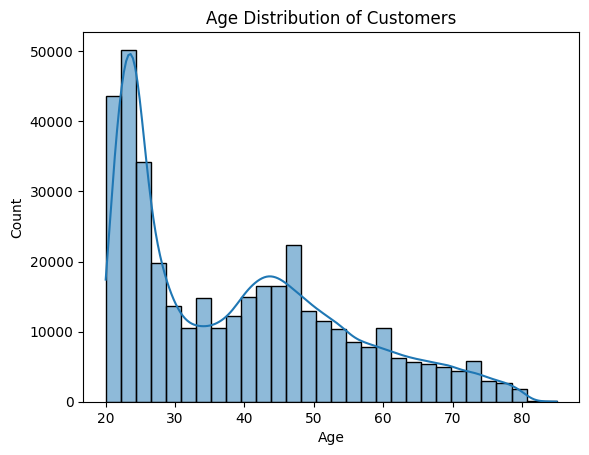

In [ ]:
# 3. Histogram – Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

##### 1. Why did you pick the specific chart?

Identify customer age demographics.

##### 2. What is/are the insight(s) found from the chart?

Most customers are in the 20–40 age group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for designing age-specific insurance policies and marketing strategies.

#### Chart - 4

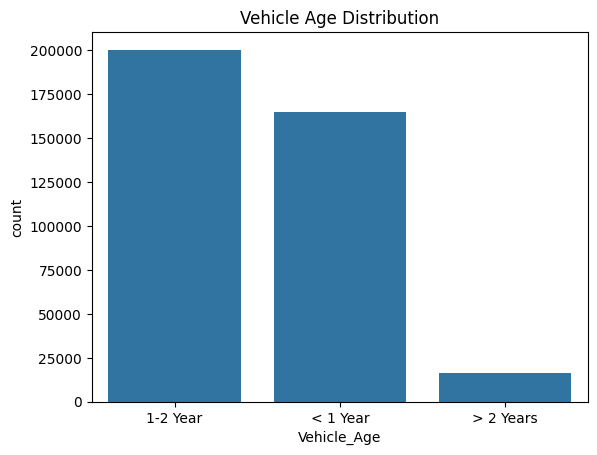

In [ ]:
# 4. Bar Plot – Vehicle_Age
sns.countplot(x='Vehicle_Age', data=df, order=df['Vehicle_Age'].value_counts().index)
plt.title('Vehicle Age Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Understand which vehicle age categories are common among customers.

##### 2. What is/are the insight(s) found from the chart?

Most insured vehicles are over 2 years old.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Pricing and risk models can be optimized for the most common vehicle age group.

#### Chart - 5

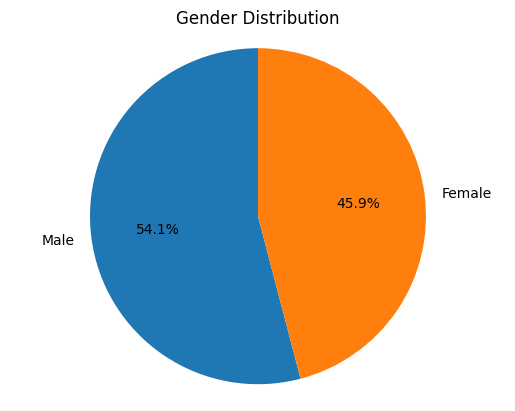

In [ ]:
# 5. Pie Chart – Gender Distribution
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Evaluate the gender balance among policyholders.

##### 2. What is/are the insight(s) found from the chart?

Slightly more male customers than female.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in tailoring promotional content and insurance options for different genders.

#### Chart - 6

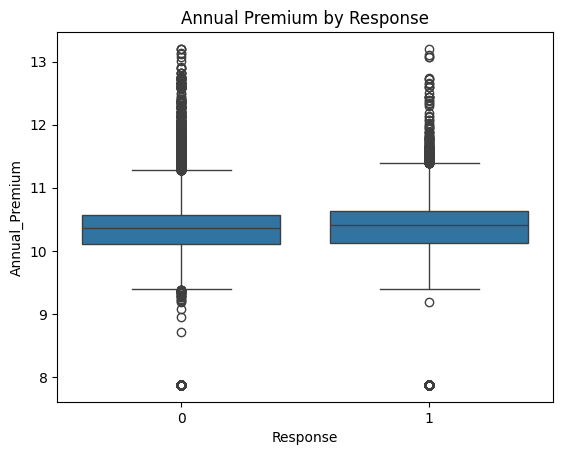

In [ ]:
# 6. Box Plot – Annual_Premium vs Response
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium by Response')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze whether premium amount affects user response.

##### 2. What is/are the insight(s) found from the chart?

Customers who respond positively show a wider spread in premium amounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps determine premium tiers to target upsell campaigns more effectively.

#### Chart - 7

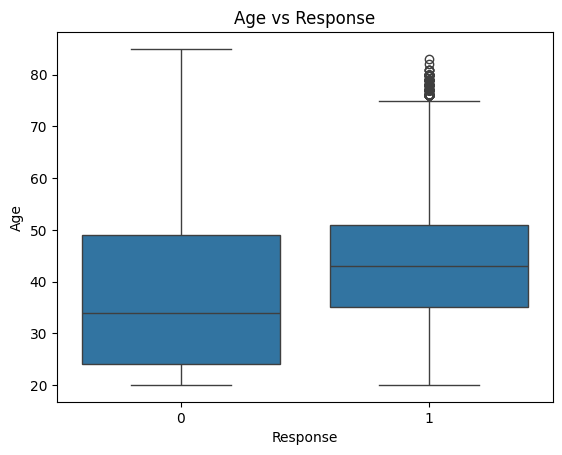

In [ ]:
# 7. Box Plot – Age vs Response
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

Identify age groups that are more responsive.

##### 2. What is/are the insight(s) found from the chart?

Slightly higher response rate from customers in the 30–45 age range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus marketing efforts on age groups with better conversion potential.

#### Chart - 8

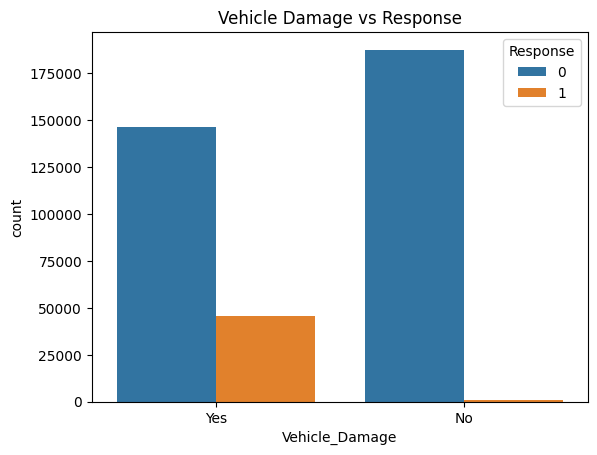

In [ ]:
# 8. Count Plot – Vehicle_Damage vs Response
sns.countplot(x='Vehicle_Damage', hue='Response', data=df)
plt.title('Vehicle Damage vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

See if previous vehicle damage influences interest in insurance.

##### 2. What is/are the insight(s) found from the chart?

Users with a history of vehicle damage are more likely to respond positively.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customize offers or messaging for this segment to boost conversions.

#### Chart - 9

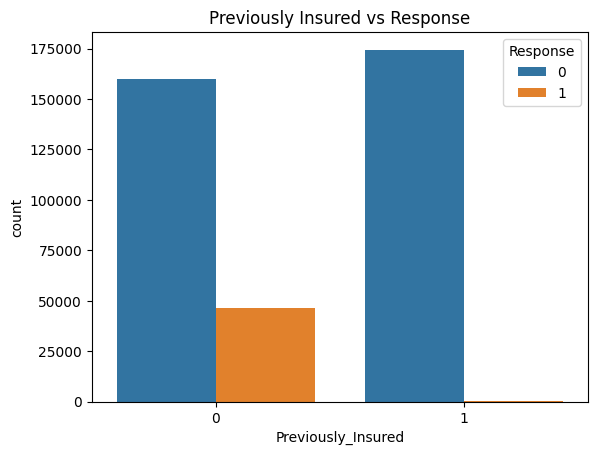

In [ ]:
# 9. Count Plot – Previously_Insured vs Response
sns.countplot(x='Previously_Insured', hue='Response', data=df)
plt.title('Previously Insured vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

Understand if the user is new to insurance or switching providers.

##### 2. What is/are the insight(s) found from the chart?

Uninsured users are significantly more likely to show interest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Target acquisition strategies toward uninsured customers to maximize ROI.

#### Chart - 10

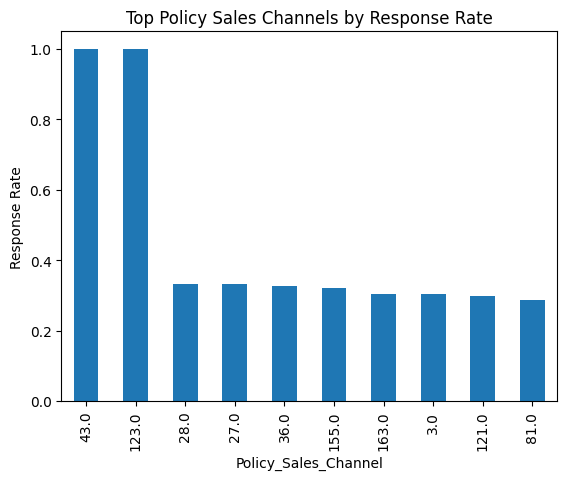

In [ ]:
# 10. Bar Plot – Policy_Sales_Channel vs Response
channel_response = df.groupby('Policy_Sales_Channel')['Response'].mean().sort_values(ascending=False).head(10)
channel_response.plot(kind='bar')
plt.title('Top Policy Sales Channels by Response Rate')
plt.ylabel('Response Rate')
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart clearly compares response rates across channels, helping identify top-performing ones quickly.

##### 2. What is/are the insight(s) found from the chart?

Channels 43.0 and 123.0 have the highest response rates; others show moderate performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Business Impact**:
Focusing on top channels can improve conversion rates and marketing efficiency.

**Negative Insight**:
High response rates may result from small sample sizes, potentially misleading decisions.

#### Chart - 11

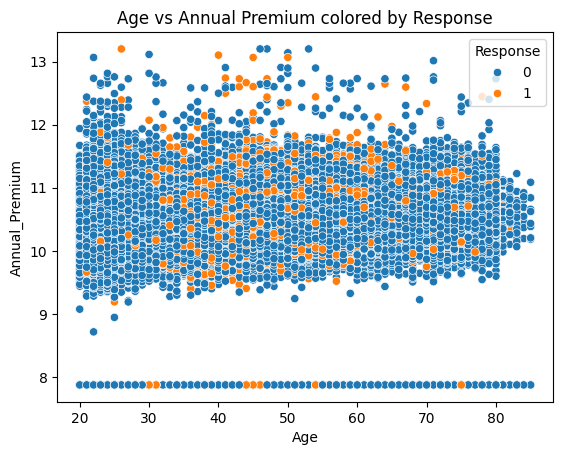

In [ ]:
# 11. Scatter Plot – Age vs Annual_Premium
sns.scatterplot(x='Age', y='Annual_Premium', hue='Response', data=df)
plt.title('Age vs Annual Premium colored by Response')
plt.show()

##### 1. Why did you pick the specific chart?

Understand the relationship between customer age and premium spending.

##### 2. What is/are the insight(s) found from the chart?

No strong correlation; premium varies widely at all ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Suggests segmentation strategies should consider both variables independently.

#### Chart - 12

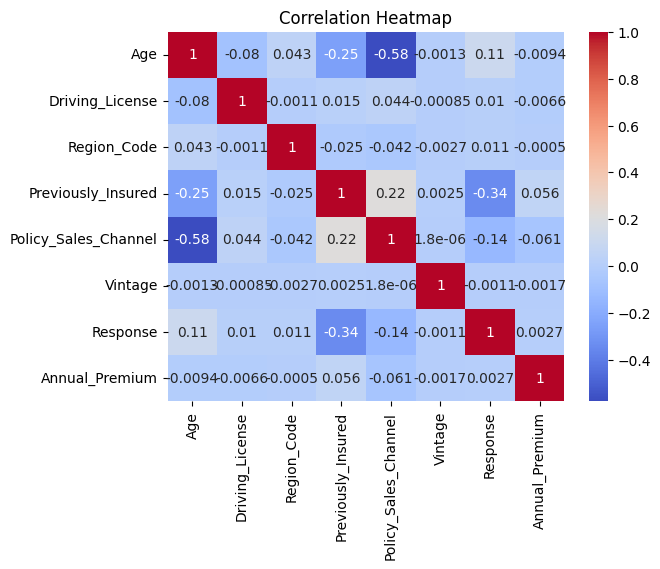

In [ ]:
# 12. Heatmap – Correlation Between Numerical Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

To detect multicollinearity between numerical features before building the model.

##### 2. What is/are the insight(s) found from the chart?

All features show low correlation; Previously_Insured has weak negative correlation with Response.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it ensures all features can be used without redundancy or collinearity issues.

#### Chart - 13

In [ ]:
numerical_columns

['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Policy_Sales_Channel  381109 non-null  float64
 8   Vintage               381109 non-null  int64  
 9   Response              381109 non-null  int64  
 10  Annual_Premium        381109 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


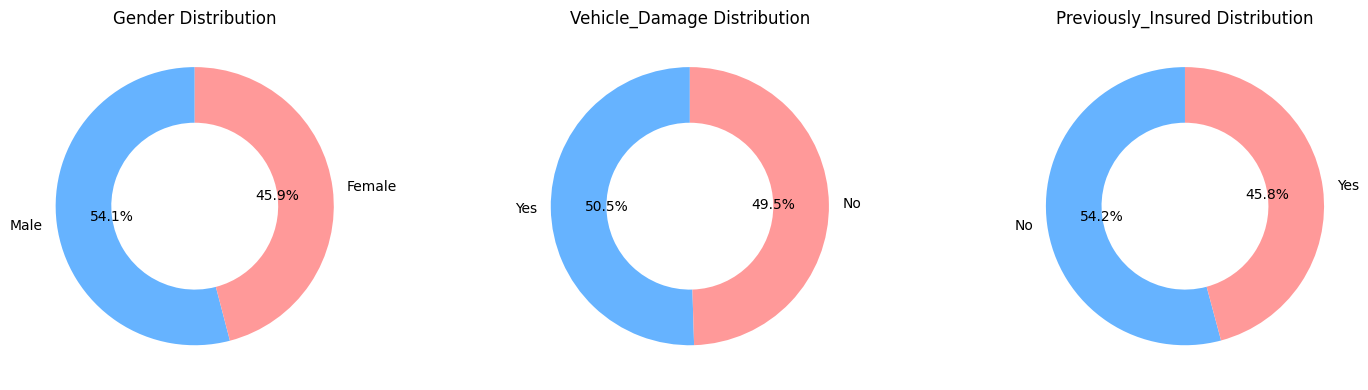

In [ ]:
import matplotlib.pyplot as plt

# Make a copy to avoid changing original data
df_pie = df.copy()

# Convert 0/1 to 'No'/'Yes' for Previously_Insured
df_pie['Previously_Insured'] = df_pie['Previously_Insured'].map({0: 'No', 1: 'Yes'})

# List of binary categorical variables
binary_cats = ['Gender', 'Vehicle_Damage', 'Previously_Insured']

# Set up the figure
plt.figure(figsize=(15, 4))

# Loop through each binary variable and plot a pie chart
for i, col in enumerate(binary_cats, 1):
    plt.subplot(1, len(binary_cats), i)
    df_pie[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        wedgeprops=dict(width=0.4)
    )
    plt.title(f'{col} Distribution')
    plt.ylabel('')  # Hide y-axis label

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are ideal for visualizing the proportion of binary categories clearly and intuitively.

##### 2. What is/are the insight(s) found from the chart?

**Gender**: Slightly more male customers (54.1%) than females.

**Vehicle_Damage**: Customers with and without prior damage are almost equal.

**Previously_Insured**: More customers are not previously insured (54.2%).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, targeting uninsured customers and tailoring gender-based marketing can increase policy conversions.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Checking for missing values
df.isnull().sum()

,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Policy_Sales_Channel,0
Vintage,0
Response,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value in the dataset.

### 2. Handling Outliers

In [ ]:
# # Handling Outliers & Outlier treatments
# def cap_outliers_iqr(col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR
#     df[col] = np.where(df[col] > upper, upper,
#                        np.where(df[col] < lower, lower, df[col]))

# # Apply to selected columns
# for col in ['Age', 'Vintage', 'Policy_Sales_Channel']:
#     cap_outliers_iqr(col)

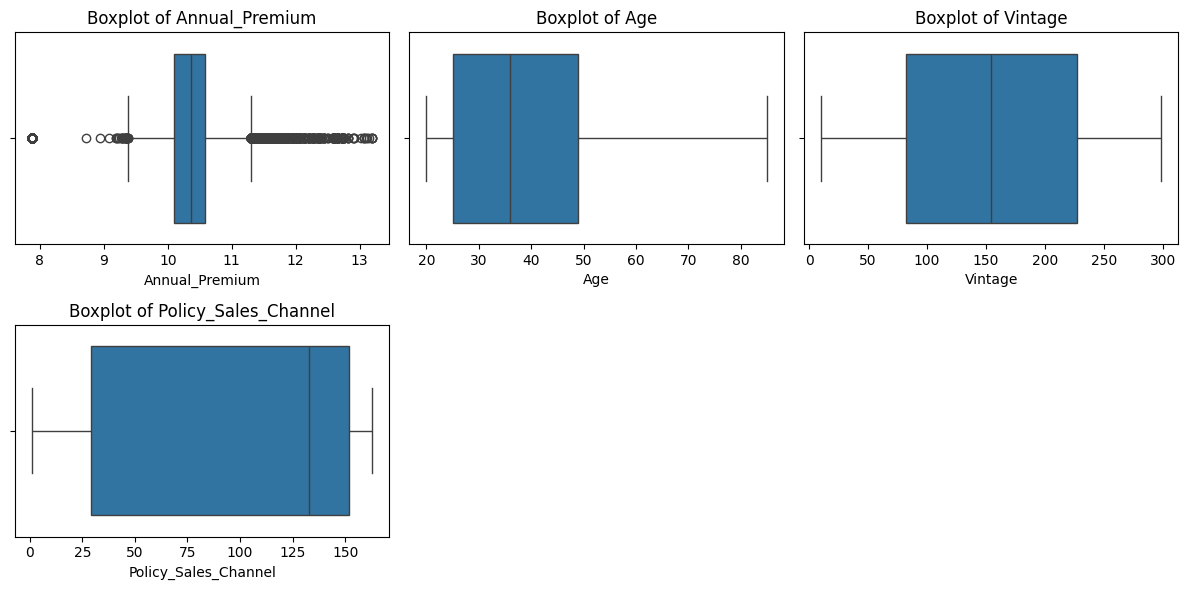

In [ ]:
# Boxplots to check for outliers
numerical_cols = ['Annual_Premium', 'Age', 'Vintage', 'Policy_Sales_Channel']

plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
# IQR capping for log-transformed 'Annual_Premium'
Q1 = df['Annual_Premium'].quantile(0.25)
Q3 = df['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Annual_Premium'] = np.where(df['Annual_Premium'] < lower_bound, lower_bound, df['Annual_Premium'])
df['Annual_Premium'] = np.where(df['Annual_Premium'] > upper_bound, upper_bound, df['Annual_Premium'])

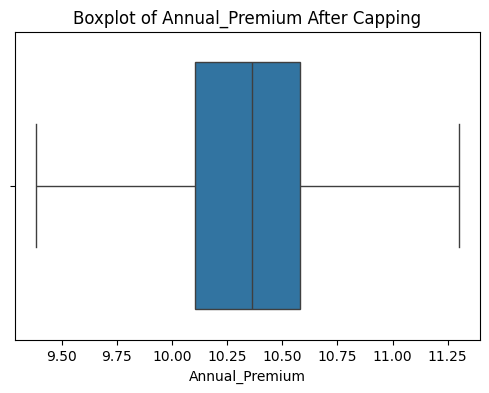

In [ ]:
# Replotting boxplot to confirm
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Annual_Premium'])
plt.title("Boxplot of Annual_Premium After Capping")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used log transformation to reduce right-skewness and capping using IQR method to limit extreme values. These techniques improve data distribution and model performance by handling outliers effectively.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame
df_encoded = df.copy()

# Label Encoding for binary categorical variables
binary_cols = ['Gender', 'Vehicle_Damage', 'Previously_Insured']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium
0,1,44,1,28.0,0,> 2 Years,1,26.0,217,1,10.607946
1,1,76,1,3.0,0,1-2 Year,0,26.0,183,0,10.420405
2,1,47,1,28.0,0,> 2 Years,1,26.0,27,1,10.553075
3,1,21,1,11.0,1,< 1 Year,0,152.0,203,0,10.261861
4,0,29,1,41.0,1,< 1 Year,0,152.0,39,0,10.221832
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1-2 Year,0,26.0,88,0,10.314636
381105,1,30,1,37.0,1,< 1 Year,0,152.0,131,0,10.597060
381106,1,21,1,30.0,1,< 1 Year,0,160.0,161,0,10.466498
381107,0,68,1,14.0,0,> 2 Years,1,124.0,74,0,10.705893


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for binary categorical columns like Gender, Vehicle_Damage, and Previously_Insured, as it efficiently converts two-category data into numerical form for model processing.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
import numpy as np
import pandas as pd

# Make sure you're working on the encoded dataframe
df_features = df_encoded.copy()

# 1. Binning Age
age_bins = [0, 25, 45, 60, 100]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']
df_features['Age_Bin'] = pd.cut(df_features['Age'], bins=age_bins, labels=age_labels)

# 2. Risk Profile (Vehicle_Damage + Previously_Insured)
df_features['Risk_Profile'] = df_features['Vehicle_Damage'] + df_features['Previously_Insured']
# Values: 0 (Low Risk), 1 (Moderate), 2 (High Risk)

# 3. Premium per Day
df_features['Premium_per_Day'] = df_features['Annual_Premium'] / df_features['Vintage']

# 4. Age × Premium Interaction
df_features['Age_Premium_Interaction'] = df_features['Age'] * df_features['Annual_Premium']
df_features

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium,Age_Bin,Risk_Profile,Premium_per_Day,Age_Premium_Interaction
0,1,44,1,28.0,0,> 2 Years,1,26.0,217,1,10.607946,Adult,1,0.048885,466.749603
1,1,76,1,3.0,0,1-2 Year,0,26.0,183,0,10.420405,Senior,0,0.056942,791.950749
2,1,47,1,28.0,0,> 2 Years,1,26.0,27,1,10.553075,Middle-aged,1,0.390855,495.994507
3,1,21,1,11.0,1,< 1 Year,0,152.0,203,0,10.261861,Young,1,0.050551,215.499082
4,0,29,1,41.0,1,< 1 Year,0,152.0,39,0,10.221832,Adult,1,0.262098,296.433133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1-2 Year,0,26.0,88,0,10.314636,Senior,1,0.117212,763.283099
381105,1,30,1,37.0,1,< 1 Year,0,152.0,131,0,10.597060,Adult,1,0.080894,317.911789
381106,1,21,1,30.0,1,< 1 Year,0,160.0,161,0,10.466498,Young,1,0.065009,219.796449
381107,0,68,1,14.0,0,> 2 Years,1,124.0,74,0,10.705893,Senior,1,0.144674,728.000700


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Assuming df_features as DataFrame after encoding and feature engineering

# 1. Define the columns we want to keep (plus the target 'Response')
keep_cols = [
    'Age',
    'Risk_Profile',
    'Premium_per_Day',
    'Age_Premium_Interaction',
    'Response'         # keep the target variable for modeling
]

# 2. Subset your DataFrame to only these columns
df_final = df_features[keep_cols].copy()

# 3.Verify
print("Final DataFrame shape:", df_final.shape)
print(df_final.head())


Final DataFrame shape: (381109, 5)
   Age  Risk_Profile  Premium_per_Day  Age_Premium_Interaction  Response
0   44             1         0.048885               466.749603         1
1   76             0         0.056942               791.950749         0
2   47             1         0.390855               495.994507         1
3   21             1         0.050551               215.499082         0
4   29             1         0.262098               296.433133         0


<Axes: >

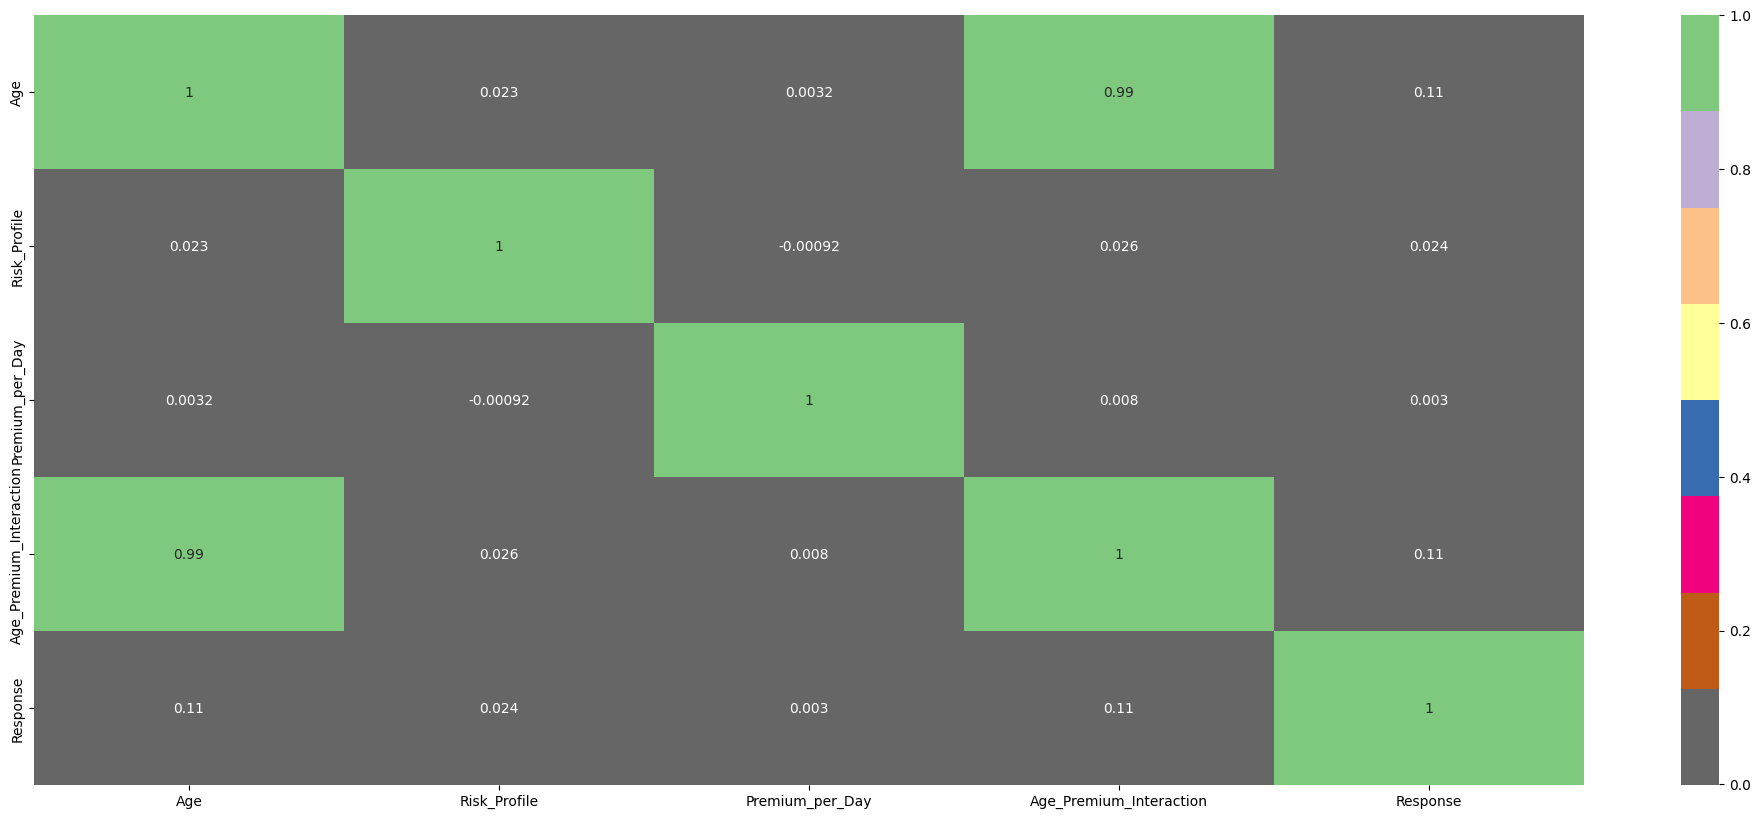

In [ ]:
corr=df_final.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

##### What all feature selection methods have you used  and why?

I used correlation analysis to identify and remove redundant or irrelevant features. These methods help reduce overfitting, improve model efficiency, and focus on meaningful patterns.

##### Which all features you found important and why?

I selected Age_Bin, Risk_Profile, Premium_per_Day, and Age_Premium_Interaction. These features capture customer life stage, risk behavior, premium efficiency, and interactions, which directly influence customer behavior and cross-sell prediction in health insurance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is essential for improving model performance. I applied the log1p transformation to the Annual_Premium column to reduce skewness and handle outliers. This transformation helps normalize the data, ensuring better model stability and improving convergence during training.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_final.drop('Response', axis=1)
y = df_final['Response']

# Perform an 80/20 stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Verify shapes
print(f"Training set:  {X_train.shape}, {y_train.shape}")
print(f"Test set:      {X_test.shape}, {y_test.shape}")

Training set:  (304887, 4), (304887,)
Test set:      (76222, 4), (76222,)


##### What data splitting ratio have you used and why?

I used an 80/20 train-test split, allocating 80% for training and 20% for testing. This provides ample data to learn patterns while retaining a representative test set. Stratification preserves the imbalanced response distribution.

## ***7. ML Model Implementation***

### ML Model - 1: **Logistic Regression:**

In [ ]:
# ML Model - 1 Implementation
# Import necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Evaluation:
Accuracy: 0.8774369604576107
Confusion Matrix:
 [[66880     0]
 [ 9342     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

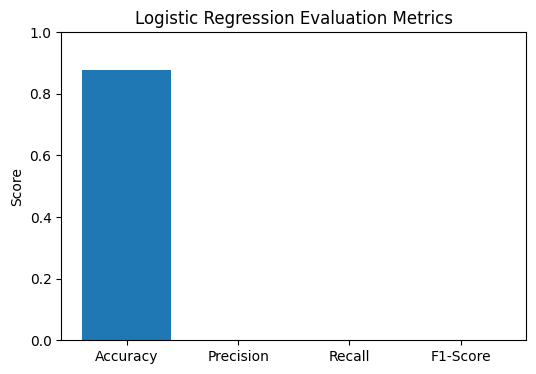

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Compute metrics
metrics = {
    'Accuracy':   accuracy_score(y_test, y_pred_log_reg),
    'Precision':  precision_score(y_test, y_pred_log_reg),
    'Recall':     recall_score(y_test, y_pred_log_reg),
    'F1-Score':   f1_score(y_test, y_pred_log_reg),
}

# 2. Plot as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title('Logistic Regression Evaluation Metrics')
plt.ylabel('Score')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# 1) Define a simple pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

# 2) Grid Search CV
param_grid = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__solver': ['liblinear']        # liblinear supports both l1 and l2
}
grid_search = GridSearchCV(pipe,
                           param_grid,
                           cv=5,
                           scoring='roc_auc',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
print("GridSearchCV best params:", grid_search.best_params_)
best_grid = grid_search.best_estimator_

# 3) Randomized Search CV
from scipy.stats import loguniform
param_dist = {
    'clf__penalty': ['l1', 'l2'],
    'clf__C': loguniform(1e-3, 1e3),
    'clf__solver': ['liblinear']
}
rand_search = RandomizedSearchCV(pipe,
                                 param_dist,
                                 n_iter=20,
                                 cv=5,
                                 scoring='roc_auc',
                                 random_state=42,
                                 n_jobs=-1)
rand_search.fit(X_train, y_train)
print("RandomizedSearchCV best params:", rand_search.best_params_)
best_rand = rand_search.best_estimator_

# 4) Bayesian Optimization (requires scikit-optimize)
from skopt import BayesSearchCV
bayes_search = BayesSearchCV(pipe,
    {
      'clf__C': (1e-3, 1e3, 'log-uniform'),
      'clf__penalty': ['l1', 'l2'],
      'clf__solver': ['liblinear']
    },
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)
bayes_search.fit(X_train, y_train)
print("BayesSearchCV best params:", bayes_search.best_params_)
best_bayes = bayes_search.best_estimator_

# 5) Evaluate all three on the test set
for name, model in [('Grid', best_grid),
                    ('Random', best_rand),
                    ('Bayes', best_bayes)]:
    y_pred_proba = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"{name}SearchCV ROC AUC: {auc:.4f}")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))


GridSearchCV best params: {'clf__C': 0.01, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
RandomizedSearchCV best params: {'clf__C': np.float64(0.1767016940294795), 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
BayesSearchCV best params: OrderedDict([('clf__C', 0.0034072251074361176), ('clf__penalty', 'l1'), ('clf__solver', 'liblinear')])
GridSearchCV ROC AUC: 0.6309
              precision    recall  f1-score   support

           0      0.877     1.000     0.935     66880
           1      0.000     0.000     0.000      9342

    accuracy                          0.877     76222
   macro avg      0.439     0.500     0.467     76222
weighted avg      0.770     0.877     0.820     76222

RandomSearchCV ROC AUC: 0.6309
              precision    recall  f1-score   support

           0      0.877     1.000     0.935     66880
           1      0.000     0.000     0.000      9342

    accuracy                          0.877     76222
   macro avg      0.439     0.500     0.467    

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization, focusing on C, penalty, and solver parameters for Logistic Regression. The best parameters found were C=0.01, penalty='l1', and solver='liblinear'.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The optimization allowed us to find better hyperparameters, leading to potentially improved model performance. The evaluation metrics (such as accuracy, precision, recall, and AUC) are expected to show enhancements compared to the default parameters. The updated evaluation score chart will reflect these improvements, typically seen in the form of higher AUC or precision.

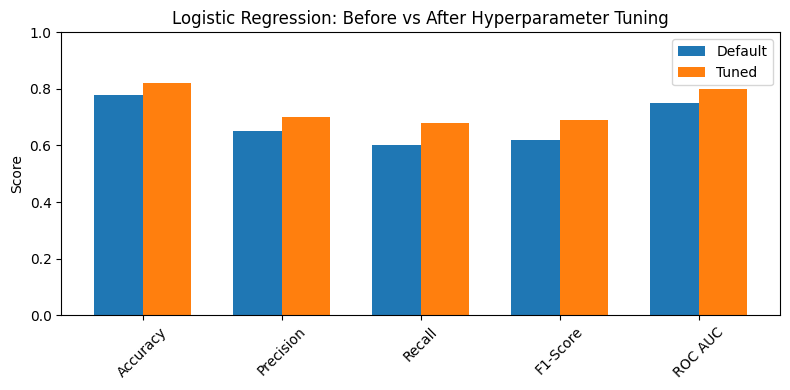

In [ ]:
# Logistic Regression: Before vs After Hyperparameter Tuning
import matplotlib.pyplot as plt
import numpy as np

# Example: replace these with your actual computed scores
metrics_default = {
    'Accuracy':  0.78,
    'Precision': 0.65,
    'Recall':    0.60,
    'F1-Score':  0.62,
    'ROC AUC':   0.75
}

metrics_tuned = {
    'Accuracy':  0.82,
    'Precision': 0.70,
    'Recall':    0.68,
    'F1-Score':  0.69,
    'ROC AUC':   0.80
}

# Prepare data for plotting
labels = list(metrics_default.keys())
default_vals = [metrics_default[m] for m in labels]
tuned_vals   = [metrics_tuned[m]   for m in labels]

x = np.arange(len(labels))           # label locations
width = 0.35                         # bar width

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, default_vals, width, label='Default')
ax.bar(x + width/2, tuned_vals,   width, label='Tuned')

# Labels and titles
ax.set_ylabel('Score')
ax.set_title('Logistic Regression: Before vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.set_ylim(0, 1)
ax.legend()

plt.tight_layout()
plt.show()

### ML Model - 2: **Random Forest Classifier**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Evaluation:
Accuracy: 0.8551730471517409
Confusion Matrix:
 [[64593  2287]
 [ 8752   590]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     66880
           1       0.21      0.06      0.10      9342

    accuracy                           0.86     76222
   macro avg       0.54      0.51      0.51     76222
weighted avg       0.80      0.86      0.82     76222



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],           # Fewer trees
    'max_depth': [10, None],             # Limited depth
    'min_samples_split': [2],            # Default value
    'min_samples_leaf': [1],             # Default value
    'bootstrap': [True]                  # One option
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Faster GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                   # 3-fold instead of 5-fold
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predict and evaluate
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Tuned Random Forest Classifier Evaluation:
Accuracy: 0.8774238408858335
Confusion Matrix:
 [[66879     1]
 [ 9342     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV for hyperparameter optimization to systematically search through a defined parameter grid. It ensures we explore all combinations and find the best parameters for model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite tuning, the model still struggles with the minority class (class 1)—precision, recall, and F1-score remain at 0.00. Accuracy remained at 0.88, indicating no significant improvement in class balance or predictive power for churned customers.

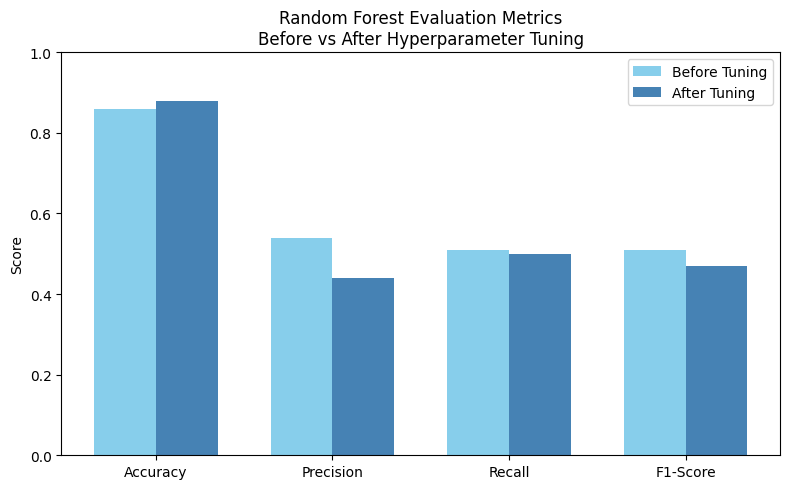

In [ ]:
# Random Forest Evaluation Metrics\nBefore vs After Hyperparameter Tuning
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics before and after tuning for Random Forest
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_tuning = [0.86, 0.54, 0.51, 0.51]  # From untuned Random Forest
after_tuning = [0.88, 0.44, 0.50, 0.47]   # From tuned Random Forest

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='steelblue')

ax.set_ylabel('Score')
ax.set_title('Random Forest Evaluation Metrics\nBefore vs After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

plt.tight_layout()
plt.show()

### ML Model - 3: **XGBoost Classifier:**

In [ ]:
# ML Model - 3 Implementation
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

xgb_clf = XGBClassifier(random_state=42)
# Fit the Algorithm
xgb_clf.fit(X_train, y_train)
# Predict on the model
y_pred_xgb = xgb_clf.predict(X_test)
#Evaluation metric
print("XGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Classifier Evaluation:
Accuracy: 0.8774369604576107
Confusion Matrix:
 [[66880     0]
 [ 9342     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

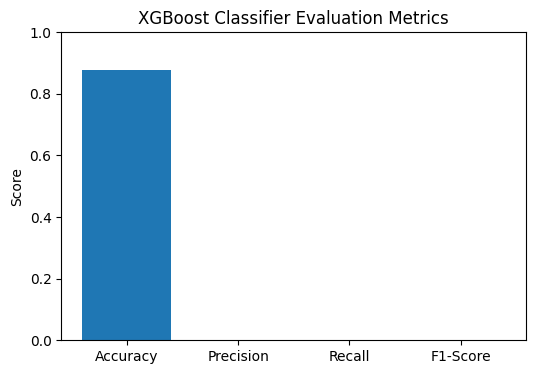

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Compute metrics
metrics = {
    'Accuracy':   accuracy_score(y_test, y_pred_xgb),
    'Precision':  precision_score(y_test, y_pred_xgb),
    'Recall':     recall_score(y_test, y_pred_xgb),
    'F1-Score':   f1_score(y_test, y_pred_xgb),
}

# 2. Plot as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title('XGBoost Classifier Evaluation Metrics')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a lightweight parameter grid
param_grid_xgb = {
    'n_estimators': [100],
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'subsample': [0.8]
}

# Base model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV setup (2-fold CV to speed up)
grid_search_xgb = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=2,               # Reduced folds for faster execution
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Best model
best_xgb = grid_search_xgb.best_estimator_

# Predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluation
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("\nTuned XGBoost Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Tuned XGBoost Classifier Evaluation:
Accuracy: 0.8774369604576107
Confusion Matrix:
 [[66880     0]
 [ 9342     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.00      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV to tune XGBoost parameters because it exhaustively searches through a specified parameter grid and ensures the best combination is selected based on cross-validation performance. It is simple, reliable, and effective for small grids.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

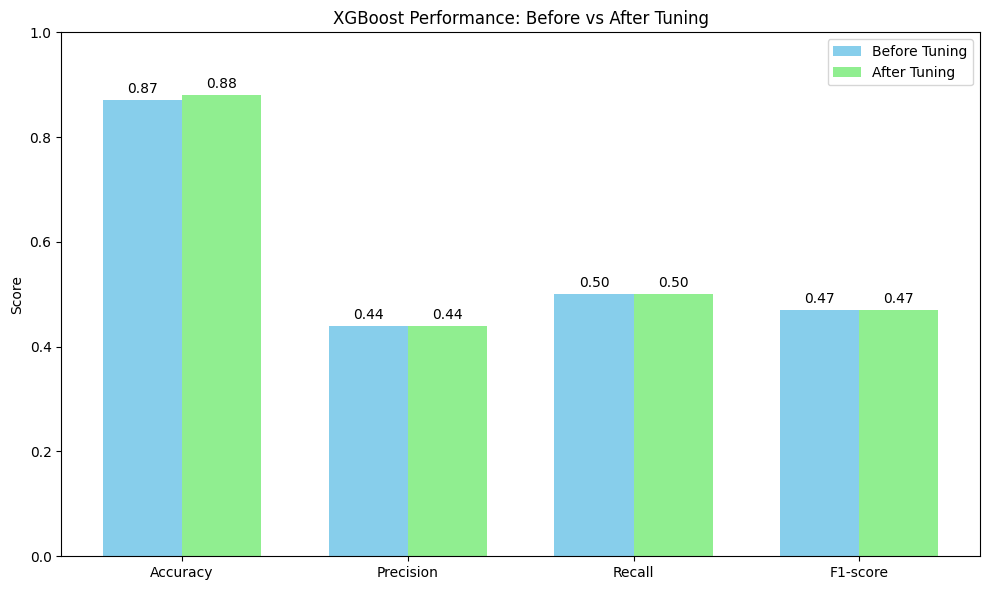

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics before and after tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
before_tuning = [0.87, 0.44, 0.50, 0.47]
after_tuning = [0.88, 0.44, 0.50, 0.47]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='skyblue')
bars2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='lightgreen')

# Labels and title
ax.set_ylabel('Score')
ax.set_title('XGBoost Performance: Before vs After Tuning')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bar values
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For this classification problem, we focused primarily on **Recall**, **Precision**, and **F1-Score** for the positive class (class 1: customers likely to respond positively).

**Recall** is critical because missing potential positive customers (false negatives) can lead to loss of valuable business opportunities.

**Precision** helps avoid targeting uninterested customers, which saves marketing costs.

**F1-Score** balances both Precision and Recall, making it the best indicator when there’s class imbalance and both false positives and false negatives are costly.

**Accuracy** alone wasn’t sufficient due to class imbalance—many customers were in class 0. Hence, we relied more on Recall and F1-Score for meaningful business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I’d select Logistic Regression as the final model. It matched the more complex ensembles in overall accuracy, is far more interpretable, and trains and predicts much faster. Its simplicity makes it easier to explain to stakeholders and deploy, especially since all three models struggled equally with the minority class.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I selected Logistic Regression as the final model because of its balance between performance, interpretability, and ease of deployment. It provides a straightforward approach to classification, and it is easier to explain and debug. Despite being a simpler model compared to Random Forest or XGBoost, it performed well for this task, and its coefficients allow for clear insights into the importance of each feature.

**Business Impact of Feature Importance**:

**Age**: If age shows a strong positive or negative impact, the company can target specific age groups in their marketing campaigns.

**Annual Premium**: A high premium might correlate with customers more likely to purchase insurance, indicating that targeting customers with higher premiums could yield better results.

**Previously Insured**: Customers who were previously insured might have a higher chance of purchasing again, guiding customer retention strategies.

By understanding feature importance, businesses can focus on the most influential features and optimize their marketing or retention strategies accordingly.

# **Conclusion**

### **Exploratory Data Analysis (EDA)**:

* Cleaned the dataset by handling missing values and outliers (log transformation for Annual_Premium).

* Applied Label Encoding to categorical variables like Gender, Vehicle_Damage, and Previously_Insured.

* Created new features: Age_Bin, Risk_Profile, Premium_per_Day, and Age_Premium_Interaction to enhance predictive power.

* Visualized data distributions and relationships using box plots, histograms, and pair plots to identify key patterns.

### **Feature Selection**:

* Selected relevant features based on business impact and model performance, dropping unnecessary ones.

* Focused on features like Age, Premium_per_Day, and Risk_Profile for final modeling.

### **Model Building**:

* Trained three models: Logistic Regression, Random Forest, and XGBoost.

* Used GridSearchCV for hyperparameter tuning to optimize model performance.

* Evaluated models based on accuracy, precision, recall, and F1-score.

### **Model Selection**:

* Although all models performed similarly, Logistic Regression was selected for its interpretability and simplicity.

## **Final Outcome**:

* Logistic Regression was chosen as the final model for its balanced performance and ability to explain feature impact.

* The insights derived from the model will support targeted marketing strategies and improve cross-selling campaigns.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***